<a href="https://colab.research.google.com/github/suranjandey2012/Machine-Learning/blob/Assignments/Machine_Learning_I_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2.4 Problem 2: Coding exercise**
**[Points:15 × 4 = 60] Let’s say you want to buy a new flat and thus need to estimate a bank loan.
You surveyed the newspapers for the price of 10 random flats spread across your city. However, the
surveyed flats are of different sizes having diverse range of essential amenities. Thus, you created the
following Table 1 listing the size of a flat, the number of bedrooms in that flat, and the corresponding
price. You want to buy a flat which is about 950-1050 sq. ft. in size having either 2 or 3 bedrooms.
Estimate the upper and lower limit of the bank loan given the data in Table 1.

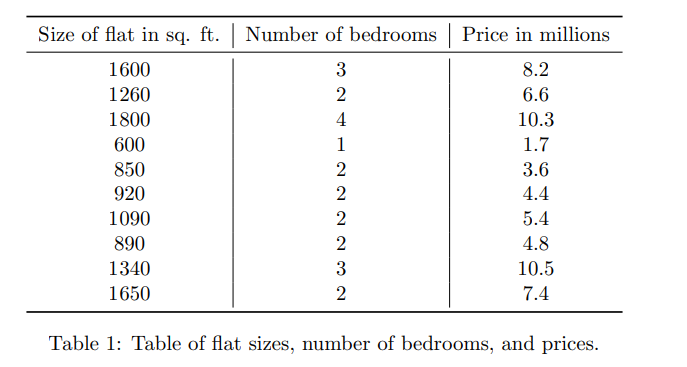**



*   **Task 2.2.a** Write a code which will provide you the least square estimation by solving the closed
form solution for such problems.





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


flat_sizes=np.array([1600,1260,1800,600,850,920,1090,890,1340,1650]).reshape(10,1)
Number_of_bedrooms=np.array([3,2,4,1,2,2,2,2,3,2]).reshape(10,1)
price=np.array([8.2,6.6,10.3,1.7,3.6,4.4,5.4,4.8,10.5,7.4])  #In millions
X=np.array([[1600,3,1],[1260,2,1],[1800,4,1],[600,1,1] ,[850,2,1] ,[920,2,1] ,[1090,2,1],[890,2,1] ,[1340,3,1],[1650,2,1]])
#print(X,X.shape)
Y=price.reshape(10,1)
XT=np.transpose(X)
#print(price.shape)
#print(XT.dot(X))
#np.linalg.inv(XT.dot(X))
Theta=np.linalg.inv(XT.dot(X)).dot(XT).dot(Y)   #Closed Form Ordinary Least Square Solution of Linear Regression
#print(Theta,Theta.shape)
a,b,c=Theta[0][0],Theta[1][0],Theta[2][0]
dataset,result=[],[]
for i in range(950,1051):
  dataset.append((i,2))
  dataset.append((i,3))

for val in dataset:
  result.append(a*val[0]+b*val[1]+c)

#print("maximum:",max(result),"index:",np.argmax(result))
#print("minimum:",min(result),"index:",np.argmin(result))


#Least Square Estimates
print("Upper Limit Of Bank Loan (in millions):",max(result))
print("Lower Limit Of Bank Loan (in millions):",min(result))


minloan1,maxloan1=min(result),max(result)


Upper Limit Of Bank Loan (in millions): 6.920297462817163
Lower Limit Of Bank Loan (in millions): 4.8791636552677415


**The 3D plot of the above problem**

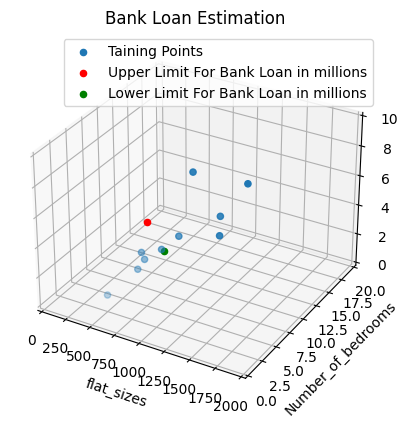

In [ ]:
fig=plt.figure()
axis=plt.axes(projection='3d')
mpl.rcParams['legend.fontsize'] = 10
axis.scatter(flat_sizes,Number_of_bedrooms,price,label="Taining Points",)
axis.set_xlabel('flat_sizes')
axis.set_ylabel('Number_of_bedrooms')
axis.set_zlabel('price')
axis.set_xlim([0,2000])
axis.set_ylim([0,20])
axis.set_zlim([0,10])
axis.scatter(dataset[0][0],dataset[0][1],6.920297462817163,color='red',label="Upper Limit For Bank Loan in millions")
axis.scatter(dataset[201][0],dataset[201][1],4.8791636552677415 ,color='green',label="Lower Limit For Bank Loan in millions")
axis.set_title("Bank Loan Estimation")
axis.legend(loc=0)
plt.show()


**Task 2.2.b** Write a code which will provide you the least square estimate by solving the problem
using a gradient decent approach. Plot the convergence of the model parameters over successive
iterations.

In [ ]:
fsize=[1600,1260,1800,600,850,920,1090,890,1340,1650]
bedroom=[3,2,4,1,2,2,2,2,3,2]
price=[8.2,6.6,10.3,1.7,3.6,4.4,5.4,4.8,10.5,7.4]
Theta=[0,0,0] #Taking initial value of parameters as all (0,0,0)
Conv=[]  #List used to store the successive values of the parameters over the iterations
#Gradient Descent Iterations
for i in range(len(fsize)):
  gradient1,gradient2,gradient3=0,0,0
  for j in range(len(fsize)):
    gradient1+=((Theta[0]*fsize[j]+Theta[1]*bedroom[j]+Theta[2])-price[j])*fsize[j]
    gradient2+=((Theta[0]*fsize[j]+Theta[1]*bedroom[j]+Theta[2])-price[j])*bedroom[j]
    gradient3+=((Theta[0]*fsize[j]+Theta[1]*bedroom[j]+Theta[2])-price[j])
  Theta[0]=Theta[0]-((0.000001/len(fsize))*gradient1)                         #Learning Rate is set to 0.000001
  Theta[1]=Theta[1]-((0.000001/len(fsize))*gradient2)
  Theta[2]=Theta[2]-((0.000001/len(fsize))*gradient3)
  Conv.append(tuple(Theta))
  #print(Theta,gradient1,gradient2,gradient3)
#print(Conv)
dataset2,result2=[],[]
for i in range(950,1051):
  dataset2.append((i,2))
  dataset2.append((i,3))

for val in dataset2:
  result2.append(Theta[0]*val[0]+Theta[1]*val[1]+Theta[2])

#Least Square Estimates
print("Upper Limit Of Bank Loan (in millions):",max(result2))
print("Lower Limit Of Bank Loan (in millions):",min(result2))

G0,G1,G2=Theta[0],Theta[1],Theta[2]
minloan2,maxloan2=min(result2),max(result2)

Upper Limit Of Bank Loan (in millions): 5.58824600575745
Lower Limit Of Bank Loan (in millions): 5.056022777695394


**Convergence of the parameters of Iterations**

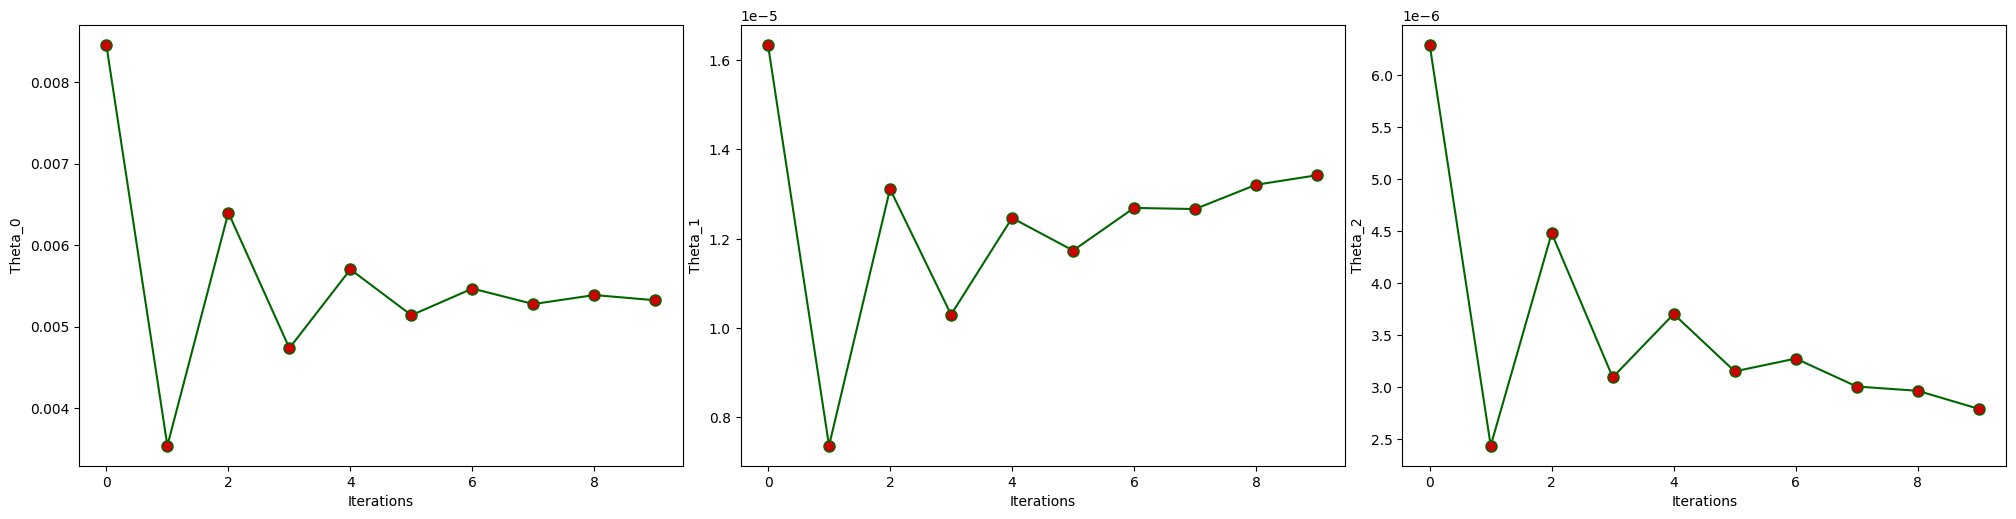

In [ ]:
fig2,axes=plt.subplots(nrows=1,ncols=3,figsize=(20,5))
plt.tight_layout()
axes[0].set_xlabel('Iterations')
axes[0].set_ylabel('Theta_0')
axes[1].set_xlabel('Iterations')
axes[1].set_ylabel('Theta_1')
axes[2].set_xlabel('Iterations')
axes[2].set_ylabel('Theta_2')
x=[i for i in range(len(flat_sizes))]
y1=[t[0] for t in Conv]
y2=[t[1] for t in Conv]
y3=[t[2] for t in Conv]
axes[0].plot(x,y1,marker='o',color='#006600',markerfacecolor='#CC0000',markersize=8)
axes[1].plot(x,y2,marker='o',color='#006600',markerfacecolor='#CC0000',markersize=8)
axes[2].plot(x,y3,marker='o',color='#006600',markerfacecolor='#CC0000',markersize=8)

**Task 2.2.c** Plot the flat prices as a function of flat size and number of bedrooms. Draw the least square estimators obtained respectively by solving the closed form solution and by gradient descent. Plot your least square estimations for the bank loan in both cases.

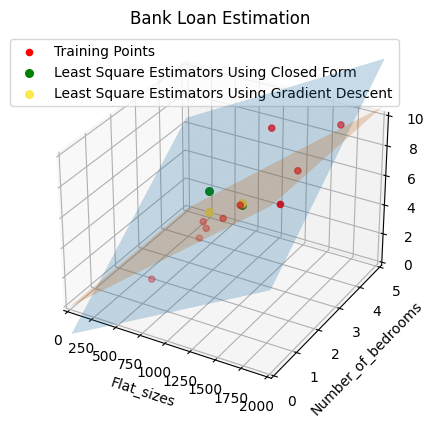

In [ ]:
from mpl_toolkits.mplot3d import axes3d

fsize=[1600,1260,1800,600,850,920,1090,890,1340,1650]
bedroom=[3,2,4,1,2,2,2,2,3,2]
price=[8.2,6.6,10.3,1.7,3.6,4.4,5.4,4.8,10.5,7.4]
axis=plt.axes(projection='3d')
#fig=plt.figure()
mpl.rcParams['legend.fontsize'] = 10
axis.scatter(fsize,bedroom,price,label="Training Points",color='red')
axis.set_xlabel('Flat_sizes')
axis.set_ylabel('Number_of_bedrooms')
axis.set_zlabel('Price')
axis.set_xlim([0,2000])
axis.set_ylim([0,5])
axis.set_zlim([0,10])
x=np.linspace(0,2000,1000)
y=np.linspace(0,5,1000)
#axis.plot(x,y,a*x+b*y+c,label="Least Square Estimator For Closed Form")
x, y = np.meshgrid(x, y)
eq1=a*x+b*y+c
eq2=G0*x+G1*y+G2
axis.plot_surface(x,y,eq1,alpha=0.25) #Least Square Estimator solving the closed form
axis.plot_surface(x,y,eq2,alpha=0.25) #Least Square Estimator using gradient descent
axis.scatter(dataset[0][0],dataset[0][1],maxloan1,color='green',label="Least Square Estimators Using Closed Form",s=30)
axis.scatter(dataset[201][0],dataset[201][1],minloan1,color='green',s=30)
axis.scatter(dataset2[0][0],dataset2[0][1],maxloan2,color='#fbe94c',label="Least Square Estimators Using Gradient Descent",s=30)
axis.scatter(dataset2[201][0],dataset2[201][1],minloan2,color='#fbe94c',s=30)
axis.set_title("Bank Loan Estimation")
axis.legend(loc=0)

plt.show()


**Task 2.2.d** Download the Portland House Price Prediction Dataset https://www.kaggle.com/
kennethjohn/housingprice. Report the 10-fold cross validation mean squared error of your
least square estimation model trained by gradient descent.


In [ ]:
fsize3=[2104,1600,2400,1416,3000,1985,1534,1427,1380,1494,1940,2000,1890,4478,1268,2300,1320,1236,2609,3031,1767,1888,1604,1962,3890,1100,1458,2526,2200,2637,1839,1000,2040,3137,1811,1437,1239,2132
,4215,2162,1664,2238,2567,1200,852,1852,1203]

bedroom3=[3,3,3,2,4,4,3,3,3,3,4,3,3,5,3,4,2,3,4,4,3,2,3,4,3,3,3,3,3,3,2,1,4,3,4,3,3,4,4,4,2,3,4,3,2,4,3]

price3=[399900,329900,369000,232000,539900,299900,314900,198999,212000,242500,239999,347000,329999,699900,259900,449900,299900,199900,499998,599000,252900,255000,242900,259900,573900,249900,464500,469000
,475000,299900,349900,169900,314900,579900,285900,249900,229900,345000,549000,287000,368500,329900,314000,299000,179900,299900,239500]


#Divide the dataset in Groups for Training and Testing
sets=[]
subset=[]
for i in range(1,48):
  obs=(fsize3[i-1],bedroom3[i-1],price3[i-1])
  subset.append(obs)
  if(0==i%5):
    sets.append(subset)
    subset=[]
sets.append(subset)
#print(sets)

#Iterations
MeanSquareErrors=[]
for i in range(len(sets)):
  Testset,Trainset=sets[i],[]
  for j in range(len(sets)):
    if(i!=j):
      for s in sets[j]:
        Trainset.append(s)
  #print(Testset,Trainset,len(Testset),len(Trainset))
  Theta=[0,0,0]
  #Gradient Descent Training Iterations
  for s in range(len(Trainset)):
    gradient1,gradient2,gradient3=0,0,0
    #Finding The Gradient
    for t in range(len(Trainset)):
      gradient1+=((Theta[0]*Trainset[t][0]+Theta[1]*Trainset[t][1]+Theta[2])-Trainset[t][2])*Trainset[t][0]
      gradient2+=((Theta[0]*Trainset[t][0]+Theta[1]*Trainset[t][1]+Theta[2])-Trainset[t][2])*Trainset[t][1]
      gradient3+=((Theta[0]*Trainset[t][0]+Theta[1]*Trainset[t][1]+Theta[2])-Trainset[t][2])
    Theta[0]=Theta[0]-((0.00000000001/len(Trainset))*gradient1)                         #Learning Rate is set to 0.00000000001
    Theta[1]=Theta[1]-((0.00000000001/len(Trainset))*gradient2)
    Theta[2]=Theta[2]-((0.00000000001/len(Trainset))*gradient3)
  #print(Theta)
  #Gradient Descent Test Iterations And Calculating The Mean Square Error
  MeanSquareErrorSum=0
  for t in range(len(Testset)):
    predicted_val=(Theta[0]*Testset[t][0])+(Theta[1]*Testset[t][1])+Theta[2]
    Actual_val=Testset[t][2]
    MeanSquareErrorSum+=(predicted_val-Actual_val)**2
  MeansquareError=MeanSquareErrorSum/len(Testset)
  MeanSquareErrors.append(MeansquareError)
Output=sum(MeanSquareErrors)/10
print("10-fold cross validation mean squared error:",Output)






10-fold cross validation mean squared error: 127256391614.29306
